Umme Rubaiyat Chowdhury
##DS3

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#reading the csv data file
df=pd.read_csv('IceCreamData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
df.head(3)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289


In [5]:
# checking the total number of null values 
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [6]:
#Checking aggregate values
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
#Assigning X and Y
X=df['Temperature']
Y=df['Revenue']

In [8]:
# splitting train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [9]:
#Importing Decision tree regressor from the sklearn tree to specify the maximum depth of the tree and
#fitting the features ie, the training set x & y
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=10)                                   
DTR.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)) 

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [10]:

print("Training score:",(DTR.score(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)))*100)
print("Testing score:",(DTR.score(X_test.values.reshape(-1,1),Y_test.values.reshape(-1,1)))*100)

Training score: 99.64121385490252
Testing score: 96.65305501126296


In [11]:
# As per model, traning score is 99.6 and testing score is 96.6, which means the model learned well and the performance of the model is good.
# so there is no much deviation between what the model learned in traning and the model predicted in testing. 

In [12]:
#Predicting the Results
predict= DTR.predict(X_test.values.reshape(-1,1))
predict

array([697.8059919 , 591.1733898 , 680.0271205 , 310.44606527,
       420.9664529 , 542.46275905, 473.47562984, 353.3256334 ,
       418.1372788 , 690.7892959 , 427.2113597 , 818.135393  ,
       612.1539491 , 471.7015569 , 520.4703098 , 690.7892959 ,
       661.4675188 , 402.4553204 , 706.7246037 , 682.7528689 ,
       625.01029186, 581.0646368 , 310.44606527, 542.3915902 ,
       190.7109408 , 603.2329422 , 828.2960767 , 542.3915902 ,
       804.2600255 , 483.4897686 , 749.3671543 , 706.7246037 ,
       463.59591319, 625.01029186, 310.44606527, 691.5165411 ,
       807.5412872 , 310.44606527, 891.4136462 , 643.0909437 ,
       581.0646368 , 606.78150895, 614.3035827 , 555.245217  ,
       666.1368355 , 969.2916296 , 401.35507627, 477.8417185 ,
       413.9140669 , 334.4337199 , 607.8391938 , 396.9356482 ,
       351.2888691 , 478.5985086 , 463.59591319, 750.4447328 ,
       690.7892959 , 158.8498064 , 969.2916296 , 447.02952323,
       607.5421478 , 376.5544719 , 427.2113597 , 566.68

In [13]:
#creating the dataframe for the actual and the predicted values
data = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':predict})
data

,Real Values,Predicted Values
304,714.560056,697.805992
340,579.307388,591.173390
47,651.861536,680.027121
67,284.772789,310.446065
479,432.819795,420.966453
...,...,...
331,678.751388,648.487376
197,715.124695,733.215828
95,212.591740,222.872317
122,655.433979,625.804642


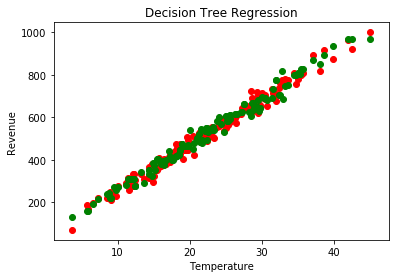

In [14]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, Y_test, color = 'red')
plt.scatter(X_test, predict, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

 
 